# 1 - Create Two Scenarios with Two Materials


This journal shows how to load the baselines and run the dynamic mas flow analysis, plotting the results for two scenarios and two materials.

### Step 1: Set Working Folder and Import PV ICE

In [3]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'Tutorial1')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Tutorial1


In [6]:
import PV_ICE
import pandas as pd

In [7]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("PV_ICE version ", PV_ICE.__version__)

Working on a  Windows 10
Python version  3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.1.0
PV_ICE version  v0.2.0+551.g3772975.dirty


### Step 2: Add Scenarios and Materials

``silicon`` and ``glass`` materials are added to the two simulations, along with a scenario, in this case the ``baseline_modules_US``. The baseline files for decadence scenario will be modified.


In [8]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='standard', massmodulefile=r'..\..\baselines\baseline_modules_mass_US.csv')
r1.scenario['standard'].addMaterial('glass', massmatfile=r'..\..\baselines\baseline_material_mass_glass.csv' )
r1.scenario['standard'].addMaterial('silicon', massmatfile=r'..\..\baselines\baseline_material_mass_silicon.csv' )

r1.createScenario('low_quality', massmodulefile=r'..\..\baselines\baseline_modules_mass_US.csv')
r1.scenario['low_quality'].addMaterial('glass', massmatfile=r'..\..\baselines\baseline_material_mass_glass.csv')
r1.scenario['low_quality'].addMaterial('silicon', massmatfile=r'..\..\baselines\baseline_material_mass_silicon.csv')

path = C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Tutorial1
Baseline folder directed to default:  C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\baselines
No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv']
No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv']


Exploring that the data got loaded properly, we can look at each scenario object, and material object saved dataframe and properties

In [9]:
r1.scenario['standard'].dataIn_m.head(2)

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_Repair,mod_MerchantTail,...,mod_EOL_pg1_landfill,mod_EOL_pg2_stored,mod_EOL_pg3_reMFG,mod_EOL_pg4_recycled,mod_EOL_reMFG_yield,mod_EOL_sp_reMFG_recycle,mod_EOL_pb1_landfill,mod_EOL_pb2_stored,mod_EOL_pb3_reMFG,mod_EOL_pb4_recycled
0,1995,12.500000,12.5,16,21,0.75,10.0,98,0,0,...,60,0,0,40,0,100,60,0,0,40
1,1996,9.667667,12.7,16,21,0.75,10.0,98,0,0,...,60,0,0,40,0,100,60,0,0,40


In [10]:
r1.scenario['standard'].material['silicon'].matdataIn_m.head(2)

,year,mat_virgin_eff,mat_massperm2,mat_MFG_eff,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_PG3_ReMFG_target,mat_ReMFG_yield,mat_PG4_Recycling_target,mat_Recycling_yield,mat_EOL_Recycled_into_HQ,mat_EOL_RecycledHQ_Reused4MFG
0,1995,20.0,848.421429,45.0,100,20,0,100,0,0,20,80,0,0
1,1996,20.4,831.785714,45.0,100,20,0,100,0,0,20,80,0,0


# Step 3: Modify values
    
PV_ICE has some dedicated functions that create changes based on improvements, but for this example we'll just be modifying values for the full column and comparing effects. To modify these columns, we specify the scenario or material parameter we want to modify, and assign the new value. In this case we are updating:
* module lifetime
* module degradation

In [16]:
r1.scenario['low_quality'].dataIn_m['mod_lifetime'] = 15 
r1.scenario['low_quality'].dataIn_m['mod_degradation'] = 1.4 

### Step 4: Run the Mass Flow Calculations on All Scenarios and Materials

In [17]:
r1.calculateMassFlow()

>>>> Calculating Material Flows <<<<

Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  low_quality
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon


Now we have results on the mass layer that we can access

In [18]:
r1.scenario['standard'].dataOut_m.keys()

Index(['Area', 'Cumulative_Active_Area', 'EOL_BadStatus', 'EOL_Landfill0',
       'EOL_PATHS', 'EOL_PG', 'Effective_Capacity_[W]', 'Landfill_0_ProjLife',
       'MerchantTail_Area', 'MerchantTail_[W]', 'ModuleTotal_MFG', 'P2_stored',
       'P3_reMFG', 'P4_recycled', 'PB1_landfill', 'PB2_stored', 'PB3_reMFG',
       'PB3_reMFG_unyield', 'PB3_reMFG_yield', 'PB4_recycled', 'PG1_landfill',
       'PG2_stored', 'PG3_reMFG', 'PG3_reMFG_unyield', 'PG3_reMFG_yield',
       'PG4_recycled', 'Power_Degraded_[W]', 'Repaired_Area', 'Repaired_[W]',
       'Resold_Area', 'Resold_[W]', 'WeibullParams',
       'Yearly_Sum_Area_EOLby_Degradation', 'Yearly_Sum_Area_EOLby_Failure',
       'Yearly_Sum_Area_EOLby_ProjectLifetime', 'Yearly_Sum_Area_PathsBad',
       'Yearly_Sum_Area_PathsGood', 'Yearly_Sum_Area_atEOL',
       'Yearly_Sum_Power_EOLby_Degradation', 'Yearly_Sum_Power_EOLby_Failure',
       'Yearly_Sum_Power_EOLby_ProjectLifetime', 'Yearly_Sum_Power_PathsBad',
       'Yearly_Sum_Power_PathsGood

What can aggregate results from dataOut_m and matdataOut_m and compile the data so we can use it more easily

In [19]:
USyearly, UScum = r1.aggregateResults()
# r1.USyearly # another way of accessing after running aggregateResults()
# r1.UScum

In [20]:
USyearly.keys()

Index(['VirginStock_glass_Simulation1_standard_[Tonnes]',
       'VirginStock_silicon_Simulation1_standard_[Tonnes]',
       'VirginStock_Module_Simulation1_standard_[Tonnes]',
       'WasteAll_glass_Simulation1_standard_[Tonnes]',
       'WasteAll_silicon_Simulation1_standard_[Tonnes]',
       'WasteAll_Module_Simulation1_standard_[Tonnes]',
       'WasteEOL_glass_Simulation1_standard_[Tonnes]',
       'WasteEOL_silicon_Simulation1_standard_[Tonnes]',
       'WasteEOL_Module_Simulation1_standard_[Tonnes]',
       'WasteMFG_glass_Simulation1_standard_[Tonnes]',
       'WasteMFG_silicon_Simulation1_standard_[Tonnes]',
       'WasteMFG_Module_Simulation1_standard_[Tonnes]',
       'VirginStock_glass_Simulation1_low_quality_[Tonnes]',
       'VirginStock_silicon_Simulation1_low_quality_[Tonnes]',
       'VirginStock_Module_Simulation1_low_quality_[Tonnes]',
       'WasteAll_glass_Simulation1_low_quality_[Tonnes]',
       'WasteAll_silicon_Simulation1_low_quality_[Tonnes]',
       'WasteAl

In [21]:
UScum.keys()

Index(['VirginStock_glass_Simulation1_standard_[Tonnes]',
       'VirginStock_silicon_Simulation1_standard_[Tonnes]',
       'VirginStock_Module_Simulation1_standard_[Tonnes]',
       'WasteAll_glass_Simulation1_standard_[Tonnes]',
       'WasteAll_silicon_Simulation1_standard_[Tonnes]',
       'WasteAll_Module_Simulation1_standard_[Tonnes]',
       'WasteEOL_glass_Simulation1_standard_[Tonnes]',
       'WasteEOL_silicon_Simulation1_standard_[Tonnes]',
       'WasteEOL_Module_Simulation1_standard_[Tonnes]',
       'WasteMFG_glass_Simulation1_standard_[Tonnes]',
       'WasteMFG_silicon_Simulation1_standard_[Tonnes]',
       'WasteMFG_Module_Simulation1_standard_[Tonnes]',
       'VirginStock_glass_Simulation1_low_quality_[Tonnes]',
       'VirginStock_silicon_Simulation1_low_quality_[Tonnes]',
       'VirginStock_Module_Simulation1_low_quality_[Tonnes]',
       'WasteAll_glass_Simulation1_low_quality_[Tonnes]',
       'WasteAll_silicon_Simulation1_low_quality_[Tonnes]',
       'WasteAl

In [22]:
r1.saveSimulation()

:) Saved Input and Output Dataframes


### Step 5: Use internal plotting functions to plot results

From this list, select the one that fits your study and select the type of plotting method. There are various plotting options:
* `plotScenariosComparison`
* `plotMaterialComparisonAcrossScenarios`
* `plotMetricResults`: You can select the following keyword options: 'VirginStock', 'WasteALL', 'WasteEOL', 'WasteMFG'
* `plotMaterialResults`
* `plotInstalledCapacityResults`

You can also view all the keywords you can use by calling the function without argumnets, or by printing the keys to the module data or the material data

In [23]:
r1.plotScenariosComparison()

Please pass a keyword:

 ** Scenario Data In Mass  ['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50', 'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff', 'mod_Repair', 'mod_MerchantTail', 'mod_EOL_collection_eff', 'mod_EOL_pg0_resell', 'mod_EOL_pg1_landfill', 'mod_EOL_pg2_stored', 'mod_EOL_pg3_reMFG', 'mod_EOL_pg4_recycled', 'mod_EOL_reMFG_yield', 'mod_EOL_sp_reMFG_recycle', 'mod_EOL_pb1_landfill', 'mod_EOL_pb2_stored', 'mod_EOL_pb3_reMFG', 'mod_EOL_pb4_recycled']

 ** Scenario Data Out Mass  ['Area', 'Cumulative_Active_Area', 'EOL_BadStatus', 'EOL_Landfill0', 'EOL_PATHS', 'EOL_PG', 'Effective_Capacity_[W]', 'Landfill_0_ProjLife', 'MerchantTail_Area', 'MerchantTail_[W]', 'ModuleTotal_MFG', 'P2_stored', 'P3_reMFG', 'P4_recycled', 'PB1_landfill', 'PB2_stored', 'PB3_reMFG', 'PB3_reMFG_unyield', 'PB3_reMFG_yield', 'PB4_recycled', 'PG1_landfill', 'PG2_stored', 'PG3_reMFG', 'PG3_reMFG_unyield', 'PG3_reMFG_yield', 'PG4_recycled', 'Power_Degraded_[W]

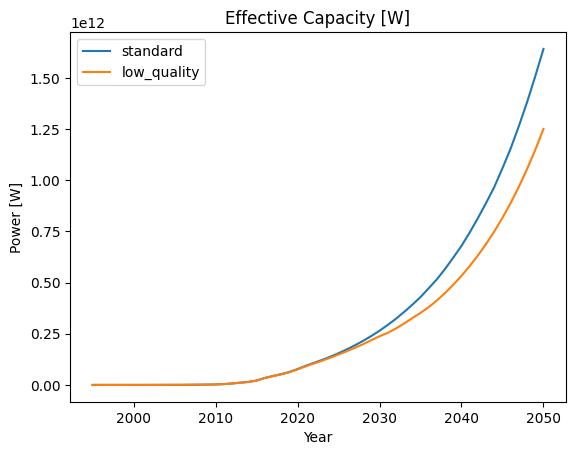

In [28]:
r1.plotScenariosComparison('Effective_Capacity_[W]')

In [26]:
r1.plotMetricResults()

[]
